## Support Vector Machine (SVM) Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2] 
y = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svc = SVC()

In [4]:
param_grid = {
    'C': [0.1, 1, 10, 100],          
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001], 
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  
    'degree': [2, 3, 4],              
}

In [5]:
clf = GridSearchCV(svc, param_grid=param_grid, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [6]:
best_param = clf.best_params_
print("Best Parameters: ", best_param)

Best Parameters:  {'C': 10, 'degree': 2, 'gamma': 0.01, 'kernel': 'sigmoid'}


In [7]:
best_model = clf.best_estimator_

In [8]:
y_pred = best_model.predict(X_test)

In [9]:
accuracy_score = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score)

Accuracy: 0.9


In [10]:
classification_report = classification_report(y_test, y_pred)
print("Classification Report:-\n", classification_report)

Classification Report:-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [11]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix)

Confusion Matrix:
 [[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


In [12]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

In [13]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

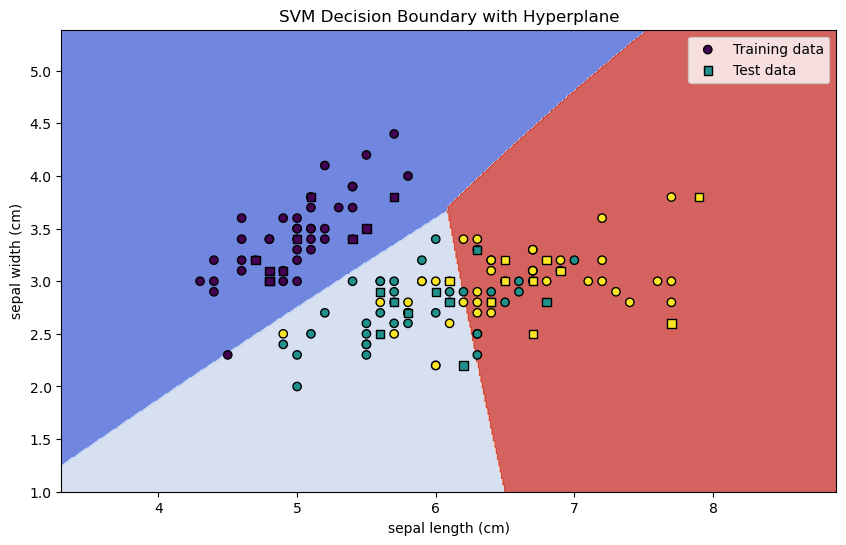

In [14]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')  # Plot decision boundary
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', label='Training data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='s', label='Test data')
plt.title('SVM Decision Boundary with Hyperplane')
plt.xlabel(iris.feature_names[0])  # Feature names
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()